<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ***Data cleaning***

In [7]:
df=titanic.copy()
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
int(df['Age'].mean())

29

In [9]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-11-92d3397e0856>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df['Cabin'].value_counts()


,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [13]:
df1 = df.drop('Cabin', axis=1)
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# ***Visualizations***

In [14]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [16]:
titanic['Sex'].value_counts()


,count
Sex,
male,577
female,314


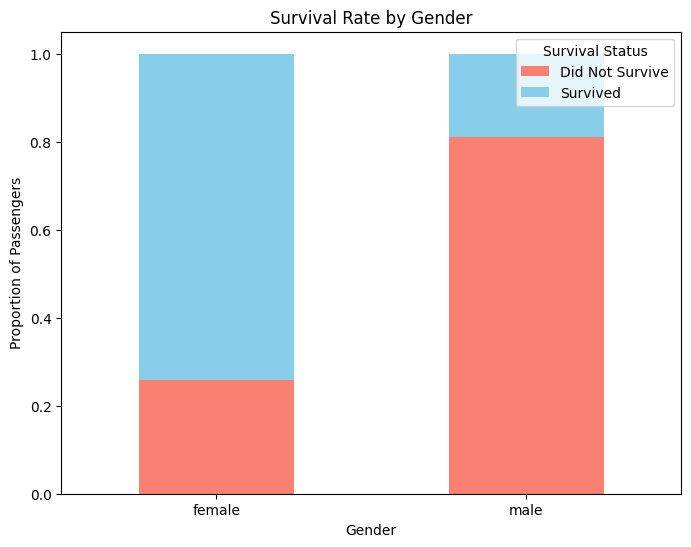

In [47]:
#Calculatin survival rates by gernder
gender_survival = df1.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

#plotting the stacked bar chat
gender_survival.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 6))

#Chart labels
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Passengers')
plt.legend(['Did Not Survive', 'Survived'], title="Survival Status")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


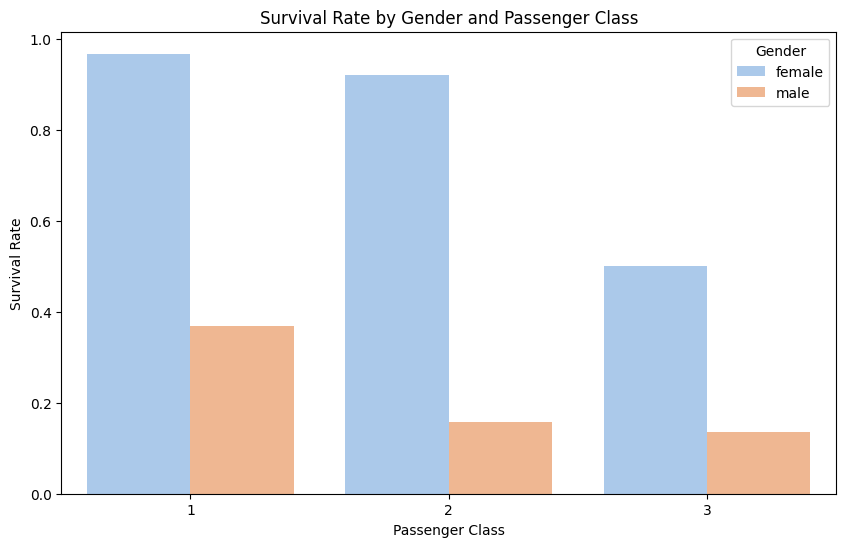

In [21]:
#creating bar plot for survival rate by gender and passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df1, errorbar=None, palette='pastel')

# Adding titles and labels
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()


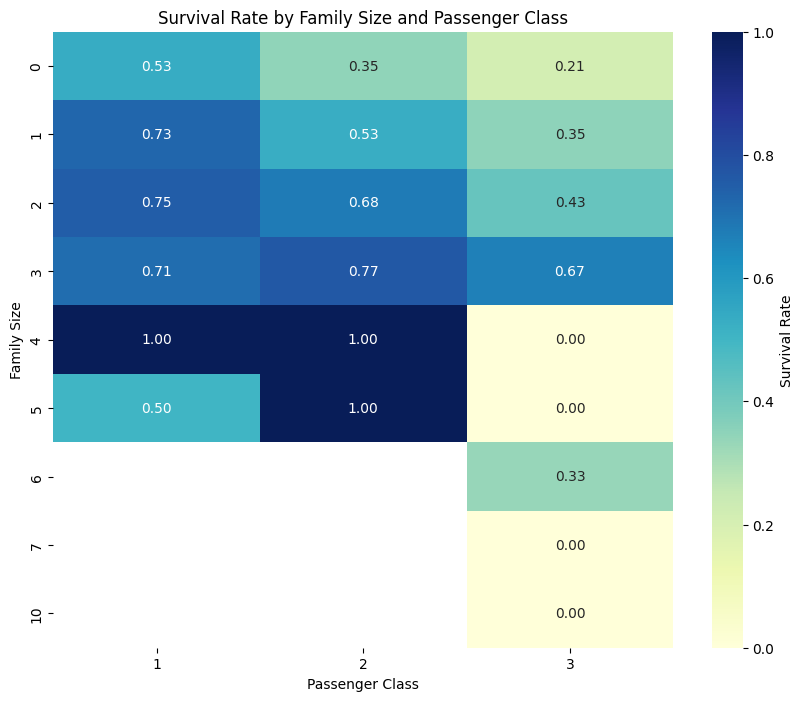

In [22]:
 #calculate Family Size
df1['Family_Size'] = df1['SibSp'] + df1['Parch']

# Pivot table to get survival rate by Family Size and Pclass
survival_by_family_pclass = df1.pivot_table(values='Survived', index='Family_Size', columns='Pclass', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(survival_by_family_pclass, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Survival Rate'})

# Adding titles and labels
plt.title('Survival Rate by Family Size and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Family Size')
plt.show()

<ipython-input-38-818b9b8e6bb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df1, palette=['salmon', 'skyblue'])


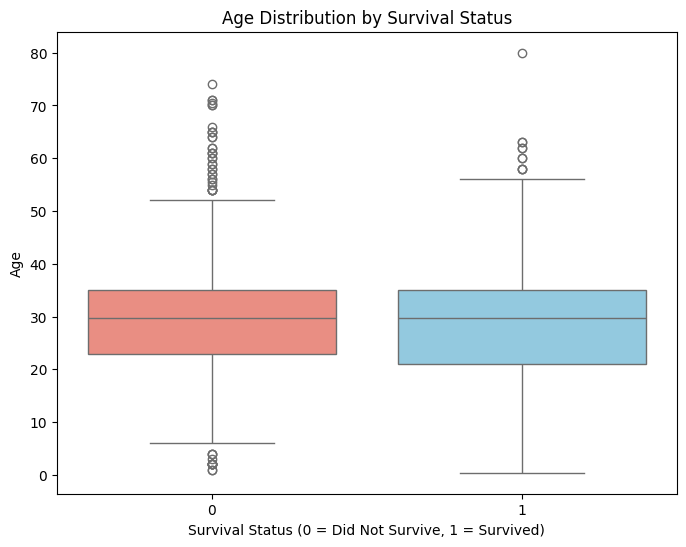

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df1, palette=['salmon', 'skyblue'])

# Adding titles and labels
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status (0 = Did Not Survive, 1 = Survived)')
plt.ylabel('Age')

plt.show()

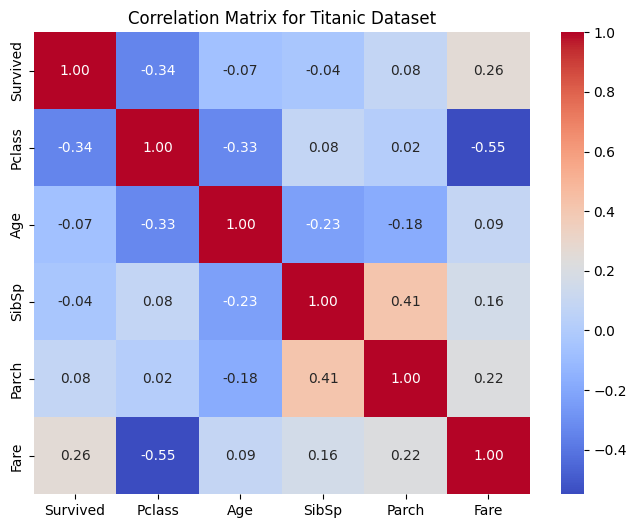

In [23]:
# Calculate correlation matrix
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding title
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()

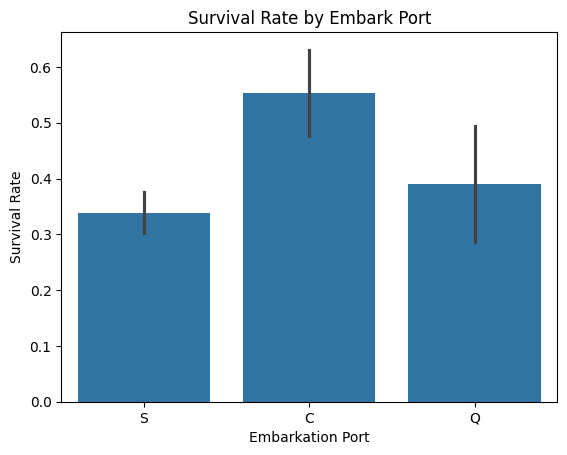

In [46]:
sns.barplot(x='Embarked', y='Survived', data=df1)
plt.title('Survival Rate by Embark Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

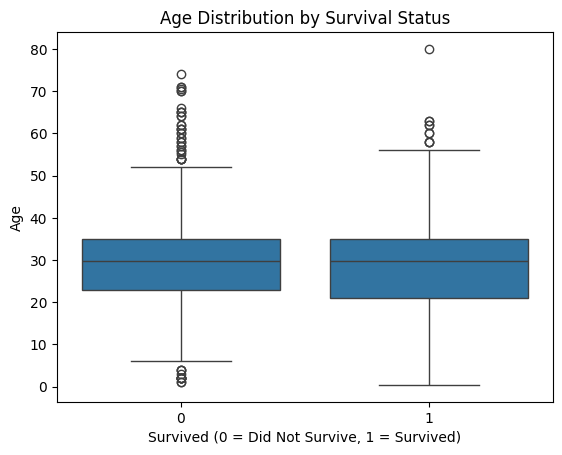

In [44]:
sns.boxplot(x='Survived', y='Age', data=df1)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = Did Not Survive, 1 = Survived)')
plt.ylabel('Age')
plt.show()


<ipython-input-48-c969322d1d71>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df1, palette='viridis')


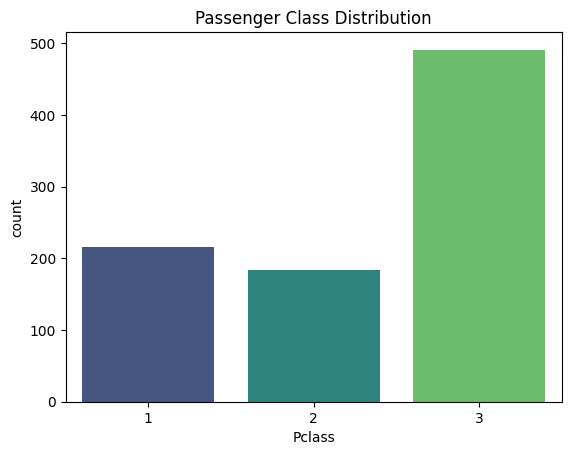

In [48]:
sns.countplot(x='Pclass', data=df1, palette='viridis')
plt.title('Passenger Class Distribution')
plt.show()